In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [8]:
data = pd.read_csv('data.csv')

data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [9]:
data.shape

(569, 33)

In [10]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [32]:
X = data.drop(columns=['diagnosis', 'id', 'Unnamed: 32'], axis=1)
Y = data['diagnosis']

In [33]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [34]:
Y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [35]:
Y = Y.map({'B': 0, 'M': 1})

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [37]:
print(X.shape, Y.shape, X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(569, 30) (569,) (455, 30) (455,) (114, 30) (114,)


In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

In [50]:
X_train_std

array([[-0.01330339,  1.7757658 , -0.01491962, ..., -0.13236958,
        -1.08014517, -0.03527943],
       [-0.8448276 , -0.6284278 , -0.87702746, ..., -1.11552632,
        -0.85773964, -0.72098905],
       [ 1.44755936,  0.71180168,  1.47428816, ...,  0.87583964,
         0.4967602 ,  0.46321706],
       ...,
       [-0.46608541, -1.49375484, -0.53234924, ..., -1.32388956,
        -1.02997851, -0.75145272],
       [-0.50025764, -1.62161319, -0.527814  , ..., -0.0987626 ,
         0.35796577, -0.43906159],
       [ 0.96060511,  1.21181916,  1.00427242, ...,  0.8956983 ,
        -1.23064515,  0.50697397]])

In [51]:
X_test_std

array([[-0.04462793, -1.41612656, -0.05903514, ..., -0.18278004,
        -1.23064515, -0.6268286 ],
       [ 0.24583601, -0.06219797,  0.21802678, ...,  0.54129749,
         0.11047691,  0.0483572 ],
       [-1.26115925, -0.29051645, -1.26499659, ..., -1.35138617,
         0.269338  , -0.28231213],
       ...,
       [ 0.72709489,  0.45836817,  0.75277276, ...,  1.46701686,
         1.19909344,  0.65319961],
       [ 0.25437907,  1.33054477,  0.15659489, ..., -1.29043534,
        -2.22561725, -1.59557344],
       [ 0.84100232, -0.06676434,  0.8929529 , ...,  2.15137705,
         0.35629355,  0.37459546]])

In [38]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [39]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [40]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,0.1537,0.06171,...,15.30,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
428,11.13,16.62,70.47,381.1,0.08151,0.03834,0.013690,0.01370,0.1511,0.06148,...,11.68,20.29,74.35,421.1,0.10300,0.06219,0.04580,0.04044,0.2383,0.07083
198,19.18,22.49,127.50,1148.0,0.08523,0.14280,0.111400,0.06772,0.1767,0.05529,...,23.36,32.06,166.40,1688.0,0.13220,0.56010,0.38650,0.17080,0.3193,0.09221
203,13.81,23.75,91.56,597.8,0.13230,0.17680,0.155800,0.09176,0.2251,0.07421,...,19.20,41.85,128.50,1153.0,0.22260,0.52090,0.46460,0.20130,0.4432,0.10860
41,10.95,21.35,71.90,371.1,0.12270,0.12180,0.104400,0.05669,0.1895,0.06870,...,12.84,35.34,87.22,514.0,0.19090,0.26980,0.40230,0.14240,0.2964,0.09606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,10.51,23.09,66.85,334.2,0.10150,0.06797,0.024950,0.01875,0.1695,0.06556,...,10.93,24.22,70.10,362.7,0.11430,0.08614,0.04158,0.03125,0.2227,0.06777
534,10.96,17.62,70.79,365.6,0.09687,0.09752,0.052630,0.02788,0.1619,0.06408,...,11.62,26.51,76.43,407.5,0.14280,0.25100,0.21230,0.09861,0.2289,0.08278
493,12.46,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.1613,0.06013,...,13.19,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028
527,12.34,12.27,78.94,468.5,0.09003,0.06307,0.029580,0.02647,0.1689,0.05808,...,13.61,19.27,87.22,564.9,0.12920,0.20740,0.17910,0.10700,0.3110,0.07592


--> Building a Neural Network

In [56]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [57]:
# Setting up the layers of the NN

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

In [58]:
# Compiling the NN

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [59]:
# Training the NN

history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 16ms/step - loss: 0.6095 - accuracy: 0.6870 - val_loss: 0.5096 - val_accuracy: 0.8043
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 0.3918 - accuracy: 0.8875 - val_loss: 0.3455 - val_accuracy: 0.8913
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2839 - accuracy: 0.9291 - val_loss: 0.2666 - val_accuracy: 0.9130
Epoch 4/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2283 - accuracy: 0.9364 - val_loss: 0.2233 - val_accuracy: 0.9130
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 0.1921 - accuracy: 0.9560 - val_loss: 0.1970 - val_accuracy: 0.9130
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1682 - accuracy: 0.9609 - val_loss: 0.1782 - val_accuracy: 0.9130
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1503 - accuracy: 0.9609 - val_loss: 0.1636 - val_accuracy: 0.9348
Epoch 8/10
13/13 [=

--> Visualizing Accuracy and loss

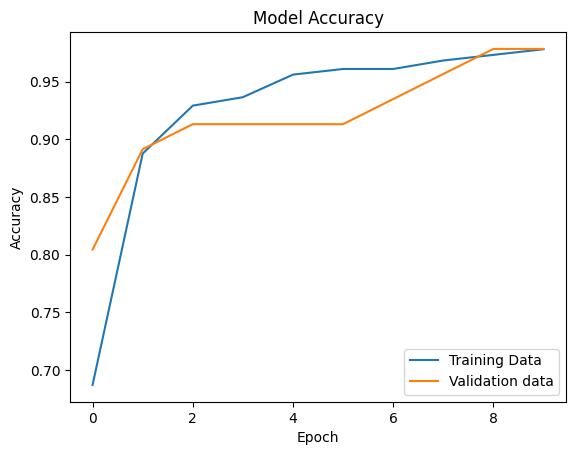

In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training Data', 'Validation data'], loc='lower right')

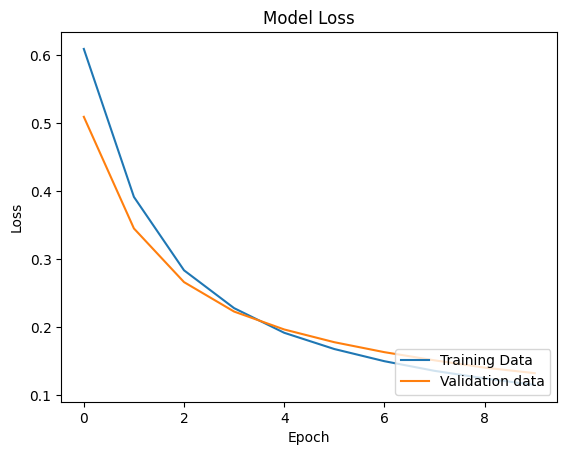

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training Data', 'Validation data'], loc='lower right')

--> Accuracy of the model on the test data

In [62]:
loss, accuracy = model.evaluate(X_test_std, Y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.1296 - accuracy: 0.9649


In [63]:
loss, accuracy

(0.12958480417728424, 0.9649122953414917)

--> Building a Predictive System

In [64]:
X_test_std.shape

(114, 30)

In [65]:
X_test_std[0]

array([-0.04462793, -1.41612656, -0.05903514, -0.16234067,  2.0202457 ,
       -0.11323672,  0.18500609,  0.47102419,  0.63336386,  0.26335737,
        0.53209124,  2.62763999,  0.62351167,  0.11405261,  1.01246781,
        0.41126289,  0.63848593,  2.88971815, -0.41675911,  0.74270853,
       -0.32983699, -1.67435595, -0.36854552, -0.38767294,  0.32655007,
       -0.74858917, -0.54689089, -0.18278004, -1.23064515, -0.6268286 ])

In [68]:
y_pred = model.predict(X_test_std)

4/4 [==============================] - 0s 2ms/step


In [69]:
y_pred.shape

(114, 2)

In [70]:
y_pred[0]

array([0.73675674, 0.23954752], dtype=float32)

In [71]:
y_pred

array([[7.3675674e-01, 2.3954752e-01],
       [6.2618548e-01, 5.1944619e-01],
       [9.4886291e-01, 1.1907713e-01],
       [2.4334210e-04, 9.5260537e-01],
       [5.2511847e-01, 3.7523314e-01],
       [2.1642033e-02, 9.4135064e-01],
       [6.9201380e-01, 3.3706301e-01],
       [9.2770278e-01, 1.2390951e-01],
       [9.2562270e-01, 2.1576577e-01],
       [8.7406564e-01, 2.6288164e-01],
       [5.9004116e-01, 5.9944248e-01],
       [8.6541802e-01, 3.9137769e-01],
       [7.8288239e-01, 2.1920180e-01],
       [7.9831970e-01, 3.5987049e-01],
       [9.4734776e-01, 2.7425143e-01],
       [2.8700927e-01, 7.7017623e-01],
       [9.2837799e-01, 1.8628946e-01],
       [8.6251211e-01, 7.3778801e-02],
       [9.2579192e-01, 8.0912560e-02],
       [1.3589428e-02, 8.9964330e-01],
       [9.7420847e-01, 3.3292275e-02],
       [8.3850443e-01, 9.1843665e-02],
       [8.9375991e-01, 1.3425189e-01],
       [9.3632209e-01, 1.7070192e-01],
       [8.2531101e-01, 3.5699862e-01],
       [9.2696637e-02, 8.

In [77]:
X_test.iloc[0]

radius_mean                 13.940000
texture_mean                13.170000
perimeter_mean              90.310000
area_mean                  594.200000
smoothness_mean              0.124800
compactness_mean             0.097550
concavity_mean               0.101000
concave points_mean          0.066150
symmetry_mean                0.197600
fractal_dimension_mean       0.064570
radius_se                    0.546100
texture_se                   2.635000
perimeter_se                 4.091000
area_se                     44.740000
smoothness_se                0.010040
compactness_se               0.032470
concavity_se                 0.047630
concave points_se            0.028530
symmetry_se                  0.017150
fractal_dimension_se         0.005528
radius_worst                14.620000
texture_worst               15.380000
perimeter_worst             94.520000
area_worst                 653.300000
smoothness_worst             0.139400
compactness_worst            0.136400
concavity_wo

In [72]:
Y_test

528    0
291    0
467    0
108    1
340    0
      ..
471    0
449    1
24     1
38     1
230    1
Name: diagnosis, Length: 114, dtype: int64

--> model.predict always gives the probabilities.

In [73]:
# Converting the probabilities to class values

y_pred_labels = [np.argmax(i) for i in y_pred]

# This function basically returns the value which has the highest probability

In [74]:
y_pred_labels[0]

0

In [82]:
input_data = (8.196,16.84,51.71,201.9,0.086,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.01646,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.1297,0.1357,0.0688,0.02564,0.3105,0.07409)

input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for one data point

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardizing the input data

input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
prediction_label = [np.argmax(prediction)]

if(prediction_label[0] == 0):
    print("The tumor is Benign")
else:
    print("The tumor is Malignant")

1/1 [==============================] - 0s 23ms/step
The tumor is Benign


C:\Users\malha\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


--> Thus, the model is predicting correctly